In [1]:
PATH='/home/kirana/Documents/phd/exp3_autoencoder'
DATAPATH='/home/kirana/Documents/final_dissertation_final/experiments/datasets/ml-1m'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [3]:
[df, df_train,df_valid,df,df_ratings,idx_to_user,\
             idx_to_movie,movie_to_idx,user_to_idx]=pickle.load(open(f'{DATAPATH}/reads.pkl','rb'))

In [4]:
df.shape

(1000209, 20)

In [5]:
df.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid,gender_idx,age_idx,title_idx,genre_idx,zip_idx
648724,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,train,1,1,1,0,1,1,1,1,1
203881,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,train,2,2,1,0,2,2,2,2,2
243394,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,train,3,3,1,0,1,1,3,3,3
788507,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,train,4,4,1,0,1,3,4,4,4
301066,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,train,5,5,1,0,1,4,5,5,5


In [6]:
df_train=df.loc[df['random_dstype']=='train']
df_valid=df.loc[df['random_dstype']!='train']

In [7]:
df_train.head().T

,648724,203881,243394,788507,301066
userId,3908,1254,1467,4717,1789
itemId,2347,1541,2617,3754,2997
rating,4,2,3,3,5
timestamp,965941231,974823280,977173059,963502544,974700402
gender,M,F,M,M,M
age,25,18,25,45,1
occupation,0,1,5,17,10
zip,10021,02144,97007,48310,19116
title,"Pope of Greenwich Village, The (1984)",Addicted to Love (1997),"Mummy, The (1999)","Adventures of Rocky and Bullwinkle, The (2000)",Being John Malkovich (1999)
genre,Action,Comedy|Romance,Action|Adventure|Horror|Thriller,Animation|Children's|Comedy,Comedy


In [8]:
df_train.shape,df_valid.shape

((900188, 20), (100021, 20))

### Add the autoencoder features

In [9]:
import pickle

In [10]:
[df_train_user_autoenc,df_valid_user_autoenc,user_mtx_1_weights,user_mtx_2_weights,df_train_user_autoenc_linear,df_valid_user_autoenc_linear]=\
    pickle.load(open(f'{DATAPATH}/inter/user_autoenc_weights.pkl','rb'))

In [11]:
[df_train_item_autoenc, df_valid_item_autoenc,item_mtx_1_weights,item_mtx_2_weights,df_train_item_autoenc_linear, df_valid_item_autoenc_linear]=\
    pickle.load(open(f'{DATAPATH}/inter/item_autoenc_weights.pkl','rb'))

In [12]:
df_train_user_autoenc.shape, type(df_train_user_autoenc),df_train_user_autoenc.head()

((6041, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0      -0.918095       2.296391       0.263371      -0.011968   
 1         1      -1.694891      -0.151930       1.124974      -1.841133   
 2         2       0.807896      -1.376931       0.162299       0.080092   
 3         3      -0.736317      -0.517018       1.213105      -1.961564   
 4         4      -1.399151       0.328619      -1.665964      -1.062431   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -0.804040      -0.389131       0.454120      -3.545166       2.439914   
 1      -2.112378      -1.080319       1.374260      -2.909504      -0.340611   
 2       0.537038       0.585960      -0.161436       1.048445      -1.035838   
 3      -1.423592      -1.065770       0.938449      -1.570770      -0.542528   
 4      -0.760788       0.939962      -1.311538      -0.389501       0.414060   
 
    user_au

In [13]:
df_valid_user_autoenc.shape, type(df_valid_user_autoenc),df_valid_user_autoenc.head()

((6041, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0      -0.710982       0.897209      -0.313327      -0.537236   
 1         1      -0.635214       0.002973       1.403316      -1.286969   
 2         2      -1.781903       0.222397      -0.553926      -1.723093   
 3         3      -0.822826      -1.370865       0.959654      -1.831420   
 4         4      -1.122299       0.172465      -0.530118      -0.993004   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -0.207326       1.817019      -0.083455      -1.915403       1.017241   
 1      -1.220138      -0.331535       1.213825      -2.250492       0.138666   
 2      -1.125409       1.774892      -0.177812      -1.222502       0.203632   
 3      -0.930850       0.896978       1.000327      -0.871036      -1.322870   
 4      -0.511379       1.123822      -0.379063      -1.483297       0.429764   
 
    user_au

In [14]:
df_train_item_autoenc.shape, type(df_train_item_autoenc),df_train_item_autoenc.head()

((3707, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -4.290696       1.535837      -2.863299       2.215095   
 1         1      -3.186090       1.619871      -4.623875       1.611612   
 2         2      -0.421671      -1.740489       0.700414       1.222373   
 3         3      -3.646142       4.019207      -4.617493       3.038867   
 4         4      -0.253813       1.821706      -0.079822       5.658348   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0       2.391089       1.921405       3.355848       4.209718       1.995065   
 1       6.894719       2.890666       3.657045       3.941945       4.006826   
 2       5.434728       2.580276      -0.305813       4.300034       2.113038   
 3       5.001753       5.424593       5.720086       4.584945       4.141813   
 4      -4.511702      -1.919843      -0.854778      -1.483453      -8.076346   
 
    ...  it

In [15]:
df_valid_item_autoenc.shape, type(df_valid_item_autoenc),df_valid_item_autoenc.head()

((3707, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -2.640463       3.512858      -1.048760       4.423928   
 1         1      -2.424724       3.152336      -4.673349       2.324574   
 2         2       0.887352      -1.248138       1.220102       0.455281   
 3         3      -0.468162       5.248226      -4.684432       1.671049   
 4         4       1.164515       2.161365      -0.585891       3.572651   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0       0.499727       1.970455       3.788411       2.612572      -4.432913   
 1       3.759815       2.444036       3.341689       2.484791       1.931070   
 2       6.160451       2.679912       0.353989       2.368717       2.061396   
 3       2.287045       3.212496       3.388133       1.611730      -0.349124   
 4      -2.329178      -0.847237      -0.582573      -0.493120      -5.531364   
 
    ...  it

In [16]:
df_valid_user_autoenc.isnull().any()

user_idx         False
user_autoenc0    False
user_autoenc1    False
user_autoenc2    False
user_autoenc3    False
user_autoenc4    False
user_autoenc5    False
user_autoenc6    False
user_autoenc7    False
user_autoenc8    False
user_autoenc9    False
dtype: bool

In [17]:
df_valid.isnull().sum()

userId                 0
itemId                 0
rating                 0
timestamp              0
gender                 0
age                    0
occupation             0
zip                    0
title                  0
genre                  0
random_dstype          0
user_idx               0
item_idx               0
dstype_random_train    0
dstype_random_valid    0
gender_idx             0
age_idx                0
title_idx              0
genre_idx              0
zip_idx                0
dtype: int64

In [18]:
df_train.isnull().sum()

userId                 0
itemId                 0
rating                 0
timestamp              0
gender                 0
age                    0
occupation             0
zip                    0
title                  0
genre                  0
random_dstype          0
user_idx               0
item_idx               0
dstype_random_train    0
dstype_random_valid    0
gender_idx             0
age_idx                0
title_idx              0
genre_idx              0
zip_idx                0
dtype: int64

In [19]:
df_train.shape, df_valid.shape

((900188, 20), (100021, 20))

In [20]:
df_train.dtypes

userId                  int64
itemId                  int64
rating                  int64
timestamp               int64
gender                 object
age                     int64
occupation              int64
zip                    object
title                  object
genre                  object
random_dstype          object
user_idx                int64
item_idx                int64
dstype_random_train     int64
dstype_random_valid     int64
gender_idx              int64
age_idx                 int64
title_idx               int64
genre_idx               int64
zip_idx                 int64
dtype: object

In [21]:
df_train.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid,gender_idx,age_idx,title_idx,genre_idx,zip_idx
648724,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,train,1,1,1,0,1,1,1,1,1
203881,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,train,2,2,1,0,2,2,2,2,2
243394,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,train,3,3,1,0,1,1,3,3,3
788507,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,train,4,4,1,0,1,3,4,4,4
301066,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,train,5,5,1,0,1,4,5,5,5


In [22]:
df_train=pd.merge(df_train,df_train_item_autoenc,on='item_idx',how='left')

In [23]:
df_train.shape

(900188, 45)

In [24]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_item_autoenc,on='item_idx',how='left')
df_valid.shape

(100021, 20)


(100021, 45)

In [25]:
df_valid.shape

(100021, 45)

In [26]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_user_autoenc,on='user_idx',how='left')
df_valid.shape

(100021, 45)


(100021, 55)

In [27]:
print(df_train.shape)
df_train=pd.merge(df_train,df_train_user_autoenc,on='user_idx',how='left')
df_train.shape

(900188, 45)


(900188, 55)

In [28]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genre', 'random_dstype', 'user_idx',
       'item_idx', 'dstype_random_train', 'dstype_random_valid', 'gender_idx',
       'age_idx', 'title_idx', 'genre_idx', 'zip_idx', 'item_autoenc0',
       'item_autoenc1', 'item_autoenc2', 'item_autoenc3', 'item_autoenc4',
       'item_autoenc5', 'item_autoenc6', 'item_autoenc7', 'item_autoenc8',
       'item_autoenc9', 'item_autoenc10', 'item_autoenc11', 'item_autoenc12',
       'item_autoenc13', 'item_autoenc14', 'item_autoenc15', 'item_autoenc16',
       'item_autoenc17', 'item_autoenc18', 'item_autoenc19', 'item_autoenc20',
       'item_autoenc21', 'item_autoenc22', 'item_autoenc23', 'item_autoenc24',
       'user_autoenc0', 'user_autoenc1', 'user_autoenc2', 'user_autoenc3',
       'user_autoenc4', 'user_autoenc5', 'user_autoenc6', 'user_autoenc7',
       'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [29]:
autoenc_cols=df_train.columns[df_train.columns.str.contains('autoenc')]

In [30]:
autoenc_cols=autoenc_cols.tolist()

In [31]:
autoenc_cols

['item_autoenc0',
 'item_autoenc1',
 'item_autoenc2',
 'item_autoenc3',
 'item_autoenc4',
 'item_autoenc5',
 'item_autoenc6',
 'item_autoenc7',
 'item_autoenc8',
 'item_autoenc9',
 'item_autoenc10',
 'item_autoenc11',
 'item_autoenc12',
 'item_autoenc13',
 'item_autoenc14',
 'item_autoenc15',
 'item_autoenc16',
 'item_autoenc17',
 'item_autoenc18',
 'item_autoenc19',
 'item_autoenc20',
 'item_autoenc21',
 'item_autoenc22',
 'item_autoenc23',
 'item_autoenc24',
 'user_autoenc0',
 'user_autoenc1',
 'user_autoenc2',
 'user_autoenc3',
 'user_autoenc4',
 'user_autoenc5',
 'user_autoenc6',
 'user_autoenc7',
 'user_autoenc8',
 'user_autoenc9']

In [32]:
df_train.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,...,-1.694891,-0.151930,1.124974,-1.841133,-2.112378,-1.080319,1.374260,-2.909504,-0.340611,-1.397754
1,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,...,0.807896,-1.376931,0.162299,0.080092,0.537038,0.585960,-0.161436,1.048445,-1.035838,-0.490745
2,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,...,-0.736317,-0.517018,1.213105,-1.961564,-1.423592,-1.065770,0.938449,-1.570770,-0.542528,-1.756809
3,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,...,-1.399151,0.328619,-1.665964,-1.062431,-0.760788,0.939962,-1.311538,-0.389501,0.414060,-0.095679
4,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,...,0.432887,-0.056065,0.165773,0.295746,0.357427,0.560581,0.050682,-1.070020,0.197620,0.240095


In [33]:
df_train[['user_idx','item_idx']+autoenc_cols].head()

,user_idx,item_idx,item_autoenc0,item_autoenc1,item_autoenc2,item_autoenc3,item_autoenc4,item_autoenc5,item_autoenc6,item_autoenc7,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,1,1,-3.186090,1.619871,-4.623875,1.611612,6.894719,2.890666,3.657045,3.941945,...,-1.694891,-0.151930,1.124974,-1.841133,-2.112378,-1.080319,1.374260,-2.909504,-0.340611,-1.397754
1,2,2,-0.421671,-1.740489,0.700414,1.222373,5.434728,2.580276,-0.305813,4.300034,...,0.807896,-1.376931,0.162299,0.080092,0.537038,0.585960,-0.161436,1.048445,-1.035838,-0.490745
2,3,3,-3.646142,4.019207,-4.617493,3.038867,5.001753,5.424593,5.720086,4.584945,...,-0.736317,-0.517018,1.213105,-1.961564,-1.423592,-1.065770,0.938449,-1.570770,-0.542528,-1.756809
3,4,4,-0.253813,1.821706,-0.079822,5.658348,-4.511702,-1.919843,-0.854778,-1.483453,...,-1.399151,0.328619,-1.665964,-1.062431,-0.760788,0.939962,-1.311538,-0.389501,0.414060,-0.095679
4,5,5,1.271805,-1.232789,2.155728,0.708601,2.945284,0.331645,-1.821778,1.437376,...,0.432887,-0.056065,0.165773,0.295746,0.357427,0.560581,0.050682,-1.070020,0.197620,0.240095


In [34]:
df_valid['rating'].describe(),df_train['rating'].describe()

(count    100021.000000
 mean          3.584587
 std           1.114938
 min           1.000000
 25%           3.000000
 50%           4.000000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64, count    900188.000000
 mean          3.581229
 std           1.117342
 min           1.000000
 25%           3.000000
 50%           4.000000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64)

In [35]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genre', 'random_dstype', 'user_idx',
       'item_idx', 'dstype_random_train', 'dstype_random_valid', 'gender_idx',
       'age_idx', 'title_idx', 'genre_idx', 'zip_idx', 'item_autoenc0',
       'item_autoenc1', 'item_autoenc2', 'item_autoenc3', 'item_autoenc4',
       'item_autoenc5', 'item_autoenc6', 'item_autoenc7', 'item_autoenc8',
       'item_autoenc9', 'item_autoenc10', 'item_autoenc11', 'item_autoenc12',
       'item_autoenc13', 'item_autoenc14', 'item_autoenc15', 'item_autoenc16',
       'item_autoenc17', 'item_autoenc18', 'item_autoenc19', 'item_autoenc20',
       'item_autoenc21', 'item_autoenc22', 'item_autoenc23', 'item_autoenc24',
       'user_autoenc0', 'user_autoenc1', 'user_autoenc2', 'user_autoenc3',
       'user_autoenc4', 'user_autoenc5', 'user_autoenc6', 'user_autoenc7',
       'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [36]:
emb_cols=['gender_idx','age_idx','title_idx','genre_idx','zip_idx']

In [37]:
[(col, df_train[col].nunique()) for col in emb_cols]

[('gender_idx', 2),
 ('age_idx', 7),
 ('title_idx', 3692),
 ('genre_idx', 301),
 ('zip_idx', 3439)]

In [38]:
[(col, min(50,df_train[col].nunique()//100)) for col in emb_cols]

[('gender_idx', 0),
 ('age_idx', 0),
 ('title_idx', 36),
 ('genre_idx', 3),
 ('zip_idx', 34)]

### Dataset and DataLoader

In [39]:
class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY,denseCols):
        self.dfX,self.dfY=dfX,dfY
        self.denseCols=denseCols
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.FloatTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])

In [40]:
dstrain=cfdata(df_train[['user_idx','item_idx']+autoenc_cols],df_train['rating'],autoenc_cols)
dsvalid=cfdata(df_valid[['user_idx','item_idx']+autoenc_cols],df_valid['rating'],autoenc_cols)

In [41]:
df_train.shape

(900188, 55)

In [42]:
bs=128

In [43]:
dltrain=DataLoader(dstrain,bs,True)

In [44]:
dlvalid=DataLoader(dsvalid,bs,True)

In [45]:
610/10, 9724/25

(61.0, 388.96)

In [46]:
len(user_to_idx),len(movie_to_idx)

(6040, 3706)

## Model Architecture

In [47]:
n_users=len(user_to_idx)
n_movies=len(movie_to_idx)
n_emb_user=50
n_emb_movie=50
min_rating=min(df_train['rating'])
max_rating=max(df_train['rating'])
dropout_e=0.1
hidden=[25,10,10]
dropouts=[0.2,0.3,0.2]

In [48]:
def hidden_layer(x,y,dropout,activation=nn.Sigmoid()):
    return nn.Sequential(
        nn.Linear(x, y),
        activation,
        nn.Dropout(p=dropout)
        )   

In [49]:
pretrain_wts=None

In [106]:
class cf(nn.Module):    
    def __init__(self,n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,autoenc_cols,pretrain_wts,\
                 dropout_e=0.01,hidden=[15,5],dropouts=[0.2,0.2],error_type="mse"):
        super().__init__()
        self.n_users,self.n_emb_user,self.n_emb_item,self.n_items,self.min_rating,self.max_rating=\
                    n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating
        self.dropout_e,self.hidden,self.dropouts=dropout_e,hidden,dropouts
        self.autoenc_cols,self.len_dense_cols=autoenc_cols,len(autoenc_cols)
        self.create_architecture()
        
        if pretrain_wts is not None:
            self.emb_user.weight.data=torch.FloatTensor(pretrain_wts[0])
            self.emb_item.weight.data=torch.FloatTensor(pretrain_wts[1])
            self.ub.weight.data=torch.FloatTensor(pretrain_wts[2])
            self.ib.weight.data=torch.FloatTensor(pretrain_wts[3])

        if error_type!="mse":
            self.criterion=nn.L1Loss()
        else:
            self.criterion=nn.MSELoss()
        
    def create_architecture(self):
        self.emb_user=nn.Embedding(self.n_users+1,self.n_emb_user)
        self.emb_item=nn.Embedding(self.n_items+1,self.n_emb_item)
        self.ub=nn.Embedding(self.n_users+1,1)
        self.ib=nn.Embedding(self.n_items+1,1)
        
        
        self.emb_dropout=nn.Dropout(self.dropout_e)

        
        self.lin1= nn.Sequential(nn.Linear(self.n_emb_user+self.n_emb_item,self.hidden[0]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[0]) )
        self.lin_bias=nn.Linear(3,1)
        self.lin2= nn.Sequential (nn.Linear(self.len_dense_cols,self.hidden[1]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[1]) )
        self.lin3= nn.Sequential (nn.Linear(self.hidden[0]+self.hidden[1]+1,self.hidden[2]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[2]))
        self.lin4=nn.Linear(self.hidden[2],1)
        
        self.bn1=nn.BatchNorm1d(self.hidden[0])
        self.bn2=nn.BatchNorm1d(self.hidden[1])
        self.bn3=nn.BatchNorm1d(self.hidden[2])
        self.bn_bias=nn.BatchNorm1d(1)
        self.sigmoid=nn.Sigmoid()
        
        
    def init_parameters(self):
        nn.init.kaiming_normal_(self.emb_user.weight.data)
        nn.init.kaiming_normal_(self.emb_item.weight.data)
        #nn.init.kaiming_normal_(lin)
       
    def forward (self,Xb,Yb):
        users=Xb[:,0].long()
        items=Xb[:,1].long()
        users=self.emb_dropout(self.emb_user(users))
        items=self.emb_dropout(self.emb_item(items))
        users_bias=self.emb_dropout(self.ub(Xb[:,0].long()))
        items_bias=self.emb_dropout(self.ib(Xb[:,1].long()))
        embed=torch.cat([users,items],1)
        out1=self.lin1(embed)
        #out1=self.bn1(out1)
        bias=torch.cat([users_bias,items_bias,users_bias+items_bias],1)
        biased=self.lin_bias(bias)
        biased=self.bn_bias(biased)
        
        denses=Xb[:,2:]
        out2=self.lin2(denses)
        out2=self.bn2(out2)
        
        out3=torch.cat([out1,out2,biased],1)
        
        
        out4=self.lin3(out3)
        #out4=self.bn3(out4)
        
        out5=self.lin4(out4)
        
        out=self.sigmoid(out5)
        
        preds=out*(self.max_rating-self.min_rating)+self.min_rating
        #preds=preds.view(-1)
        loss=self.criterion(preds,Yb)
        return preds,loss

In [72]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,dropout_e,hidden,dropouts,error_type="mse")

In [73]:
cfobj

cf(
  (emb_user): Embedding(6041, 50)
  (emb_item): Embedding(3707, 50)
  (ub): Embedding(6041, 1)
  (ib): Embedding(3707, 1)
  (emb_dropout): Dropout(p=0.1)
  (lin1): Sequential(
    (0): Linear(in_features=100, out_features=25, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin_bias): Linear(in_features=3, out_features=1, bias=True)
  (lin2): Sequential(
    (0): Linear(in_features=35, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin3): Sequential(
    (0): Linear(in_features=36, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin4): Linear(in_features=10, out_features=1, bias=True)
  (bn1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_bias): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_r

In [74]:
for Xb, Yb in dltrain:
    break

In [75]:
Xb.shape, Yb.shape

(torch.Size([128, 37]), torch.Size([128, 1]))

In [76]:
Xb.dtype

torch.float32

In [77]:
cfobj.forward(Xb,Yb)

(tensor([[3.1933],
         [3.0326],
         [3.4213],
         [3.1594],
         [3.1907],
         [3.2309],
         [3.1833],
         [3.1639],
         [3.2449],
         [3.5330],
         [3.2946],
         [3.1910],
         [3.2915],
         [3.2300],
         [3.1723],
         [3.1671],
         [3.1511],
         [3.1828],
         [3.1463],
         [3.1909],
         [3.3104],
         [3.4166],
         [3.1475],
         [3.4940],
         [3.1906],
         [3.2023],
         [3.1905],
         [3.3641],
         [3.5045],
         [3.0947],
         [3.2272],
         [3.3443],
         [3.2676],
         [3.2703],
         [3.2541],
         [3.2102],
         [3.1431],
         [3.8410],
         [3.1675],
         [3.4293],
         [3.2157],
         [3.1433],
         [3.3908],
         [3.1397],
         [3.2275],
         [3.4211],
         [3.1643],
         [3.2656],
         [3.3497],
         [3.1826],
         [3.2077],
         [3.3054],
         [3.

## Learner

In [79]:
class Learner():
    def __init__(self,model,optimizer,metric_fn,device,bptt=12,print_every=5,clip_val=None,\
                 cycle_mult=0,lr_decay=0.7,wd_mult=6,start_lr=2e-2, end_lr=5e-4,error_type="mse"):
        self.model,self.optimizer,self.metric_fn,self.device,self.print_every,self.bptt,self.losses,self.clip_val=\
            model,optimizer,metric_fn,device,print_every,bptt,[],clip_val
        self.n_epochs=1
        self.cycle_mult,self.lr_decay=cycle_mult,lr_decay
        self.wd_mult=wd_mult
        for param_group in self.optimizer.param_groups:
            self.start_lr=param_group['lr']
            self.start_wd=param_group['weight_decay']
        self.wd=self.start_wd
        self.lr=self.start_lr
        self.end_lr=end_lr
        self.n_epoch=0
        self.lrs=[1e-2,5e-3,1e-4,5e-4]
        self.preds,self.preds_valid,self.trainY,self.actual=[],[],[],[]
        self.ratio=self.end_lr/self.start_lr
        self.num_steps=self.cycle_mult
        self.reset_cycle=self.cycle_mult
        self.error_type=error_type
        
    def fit (self,Xb,Yb,mode_train=True):
        if mode_train:
            self.model.train()
        else:
            self.model.eval()
        
        #import pdb
        #pdb.set_trace()
        preds,loss=self.model(Xb,Yb)

     
        if mode_train:
            if 1==0:
                lr =self.lrs[torch.randint(0,4,(1,))]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        myloss=loss.item()
    
        
        with torch.no_grad():
            if self.error_type == "mse":
                acc=nn.L1Loss() (preds,Yb)
                myrmse=np.sqrt(myloss)
            else:
                acc=nn.MSELoss() (preds,Yb)
                myrmse=np.sqrt(acc.item())
            acc=acc.item()
                 
   
        del preds
        del loss
        
        if self.clip_val is not None:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.clip_val)
        
        return myloss, acc, myrmse
    
    def lr_find (self,start_lr,end_lr,iterator,n_batch):
        losses,lrs=[],[]
        ratio=end_lr/start_lr
        num_steps=n_batch
        lr=start_lr
        for i in range(num_steps):            
            lr=lr*(end_lr/start_lr)**(1/num_steps)
            lrs.append(lr)
        self.lrs=lrs
        self.run_epoch(iterator,mode_train=True,lrs=lrs)
    
    def run_epoch(self,iterator,mode_train,lrs=None):
        epoch_loss,epoch_acc,i,k=0,0,0,0
        epoch_rmse=0


        for Xb,Yb in iterator:
            Xb=Xb.to(self.device)
            Yb=Yb.to(self.device)
            
            if lrs is not None:
                lr=lrs[k]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr 
            

            loss,acc,myrmse=self.fit(Xb,Yb,mode_train)
            
            if lrs is not None:
                self.losses.append(loss)


            

            epoch_loss+=loss
            epoch_acc+=acc
            epoch_rmse+=myrmse
            
            k=k+1
            if k%self.print_every == 0:
                if k:
                    print (f'Batch:{k} {epoch_loss/(k)}  ')  
                    torch.cuda.empty_cache()

        epoch_loss=epoch_loss/len(iterator)
        epoch_acc=epoch_acc/len(iterator)
        epoch_rmse=epoch_rmse/len(iterator)
            
        return epoch_loss,epoch_acc,epoch_rmse
    
    def plot_lrs(self, n_roll=1,ylim=None,xlim=None):
        import seaborn as sns
        ax=sns.lineplot(x=self.lrs,y=pd.Series(self.losses).rolling(n_roll).mean())
        ax.set_xscale('log')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate')
        if ylim is not None:
            plt.ylim(ylim)
        if xlim is not None:
            plt.xlim(xlim)

     
    def run_epochs(self,dltrain,dlvalid,n_epochs=1):              
        for epoch in range(n_epochs):                
            loss,acc,rmse=self.run_epoch(dltrain,True)

            lossv,accv,rmsev=self.run_epoch(dlvalid,mode_train=False)
           
            if self.error_type=="mse":
                loss_mse=loss
                loss_rmse=rmse
                loss_mae=acc
                lossv_mse=lossv
                lossv_rmse=rmsev
                lossv_mae=accv
                
            else:
                loss_mse=acc
                loss_rmse=rmse
                loss_mae=loss
                lossv_mse=accv
                lossv_rmse=rmsev
                lossv_mae=lossv
            
            print (f'Epoch:{epoch} Learning rate {self.lr} Weight Decay {self.wd} Train Loss:{loss} \
                Valid Loss:{lossv} Train RMSE:{loss_rmse} Valid RMSE:{lossv_rmse} Train MSE:{loss_mse} Valid MSE:{lossv_mse} \
                Train MAE:{loss_mae} Valid MAE:{lossv_mae}')

              
         
     
            if self.cycle_mult:
                if self.n_epoch==self.reset_cycle:
                    self.lr=self.start_lr
                    #self.wd=self.start_wd
                    self.reset_cycle*=self.cycle_mult
                    #reset_cycle=self.n_epoch+reset_cycle
                    self.n_epoch=0
                    self.ratio=self.end_lr/self.start_lr
                    self.num_steps=self.reset_cycle
                else:
                    #self.lr*=(self.lr_decay**self.n_epoch)  
                    #if self.n_epoch>1:
                    #    self.wd*=self.wd_mult
                    self.lr=self.lr*(self.end_lr/self.start_lr)**(1/self.num_steps)
                    self.n_epoch+=1
        

                
            for param_group in self.optimizer.param_groups:
                param_group['lr']=self.lr
                #param_group['weight_decay']=self.wd
          
     

In [80]:
device='cuda:1'

In [103]:
del cfobj

In [102]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,dropout_e,hidden,dropouts,error_type="mse")

In [83]:
cfobj=cfobj.to(device)

In [84]:
cfobj

cf(
  (emb_user): Embedding(6041, 50)
  (emb_item): Embedding(3707, 50)
  (ub): Embedding(6041, 1)
  (ib): Embedding(3707, 1)
  (emb_dropout): Dropout(p=0.1)
  (lin1): Sequential(
    (0): Linear(in_features=100, out_features=25, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin_bias): Linear(in_features=3, out_features=1, bias=True)
  (lin2): Sequential(
    (0): Linear(in_features=35, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin3): Sequential(
    (0): Linear(in_features=36, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin4): Linear(in_features=10, out_features=1, bias=True)
  (bn1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_bias): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_r

In [85]:
len(dltrain)

7033

In [86]:
dltrain.batch_size

128

In [87]:
wd=1e-7
optimizer=torch.optim.Adam(cfobj.parameters(),lr=7e-3,betas=(0.9,0.999), weight_decay=wd)


In [88]:
learner=Learner(cfobj,optimizer,None,device,0,8000,0.25,cycle_mult=0,error_type="mse")

In [89]:
learner.lr_find(1e-4,1e-1,dltrain,len(dltrain))

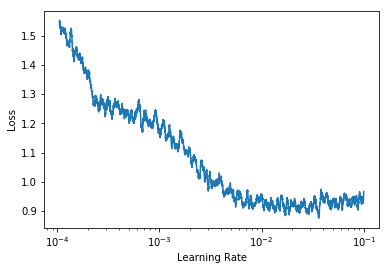

In [90]:
learner.plot_lrs(50)

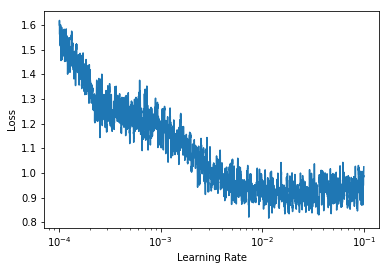

In [91]:
learner.plot_lrs(10)

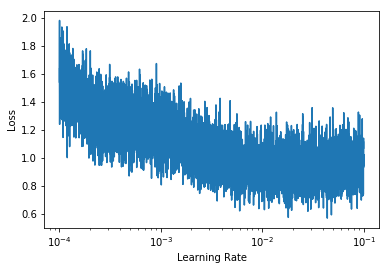

In [92]:
learner.plot_lrs(1)

In [114]:
del cfobj
torch.cuda.empty_cache()

In [115]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,pretrain_wts,dropout_e,hidden,dropouts,error_type="mse")
cfobj=cfobj.to(device)

In [116]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=4e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [117]:
if 1==1:
    cfobj.emb_user.weight.requires_grad=False
    cfobj.emb_item.weight.requires_grad=False
    cfobj.ib.weight.requires_grad=False
    cfobj.ub.weight.requires_grad=False

In [118]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.004 Weight Decay 1e-07 Train Loss:1.193882056605031                 Valid Loss:1.1313054111912428 Train RMSE:1.0908129174631664 Valid RMSE:1.061854223461645 Train MSE:1.193882056605031 Valid MSE:1.1313054111912428                 Train MAE:0.898084961383217 Valid MAE:0.874817115495272
Epoch:1 Learning rate 0.004 Weight Decay 1e-07 Train Loss:1.1650882473833342                 Valid Loss:1.1259279673361717 Train RMSE:1.0775055363536086 Valid RMSE:1.0593757297325512 Train MSE:1.1650882473833342 Valid MSE:1.1259279673361717                 Train MAE:0.8832174984418565 Valid MAE:0.8749773965772155
Epoch:2 Learning rate 0.004 Weight Decay 1e-07 Train Loss:1.1546386877215469                 Valid Loss:1.1101168846077931 Train RMSE:1.072668832257781 Valid RMSE:1.0518640543775477 Train MSE:1.1546386877215469 Valid MSE:1.1101168846077931                 Train MAE:0.8775680037611293 Valid MAE:0.8647071975271415
Epoch:3 Learning rate 0.004 Weight Decay 1e-07 Train Loss:1.1

In [119]:
if 1==1:
    cfobj.emb_user.weight.requires_grad=True
    cfobj.emb_item.weight.requires_grad=True
    cfobj.ib.weight.requires_grad=True
    cfobj.ub.weight.requires_grad=True

In [120]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.004 Weight Decay 1e-07 Train Loss:0.9593728153935778                 Valid Loss:0.8446905149523255 Train RMSE:0.9770612376962762 Valid RMSE:0.9170067137566865 Train MSE:0.9593728153935778 Valid MSE:0.8446905149523255                 Train MAE:0.7851197167851754 Valid MAE:0.7320019770461275
Epoch:1 Learning rate 0.004 Weight Decay 1e-07 Train Loss:0.8722298411578554                 Valid Loss:0.8278771869819183 Train RMSE:0.9318895123643408 Valid RMSE:0.9077553095934172 Train MSE:0.8722298411578554 Valid MSE:0.8278771869819183                 Train MAE:0.7438171487791548 Valid MAE:0.7246789073242861
Epoch:2 Learning rate 0.004 Weight Decay 1e-07 Train Loss:0.8472820707020406                 Valid Loss:0.8129185442729374 Train RMSE:0.9184118129534921 Valid RMSE:0.8997227502859891 Train MSE:0.8472820707020406 Valid MSE:0.8129185442729374                 Train MAE:0.7312483712956659 Valid MAE:0.7183308575464331
Epoch:3 Learning rate 0.004 Weight Decay 1e-07 Train Lo

KeyboardInterrupt: 

In [99]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=2e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=4,start_lr=2e-3,end_lr=2e-4)

In [100]:
learner.run_epochs(dltrain,dlvalid,15)

Epoch:0 Learning rate 0.002 Weight Decay 1e-07 Train Loss:0.7961333878862727                 Valid Loss:0.7734819366346539 Train RMSE:0.8902552455768353 Valid RMSE:0.8773897992006846 Train MSE:0.7961333878862727 Valid MSE:0.7734819366346539                 Train MAE:0.7039911157458059 Valid MAE:0.6908084346967585
Epoch:1 Learning rate 0.0012619146889603866 Weight Decay 1e-07 Train Loss:0.7833135169252095                 Valid Loss:0.7718294600544073 Train RMSE:0.8829820114049336 Valid RMSE:0.8763165964730234 Train MSE:0.7833135169252095 Valid MSE:0.7718294600544073                 Train MAE:0.6974673779424692 Valid MAE:0.6874728450537337
Epoch:2 Learning rate 0.0007962143411069946 Weight Decay 1e-07 Train Loss:0.7763234605986482                 Valid Loss:0.768311529589431 Train RMSE:0.878996091283621 Valid RMSE:0.8745488118880845 Train MSE:0.7763234605986482 Valid MSE:0.768311529589431                 Train MAE:0.693874162604184 Valid MAE:0.690383895507554


KeyboardInterrupt: 

In [179]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cf_plus_tl_model')
torch.save(learner,f=f'{DATAPATH}/inter/cf_plus_tl_learner')
torch.save(optimizer,f=f'{DATAPATH}/inter/cf_plus_tl_optimizer')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_state_dict')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_optimizer_state_dict')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [180]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=4e-4,end_lr=4e-5)

In [181]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.0004 Weight Decay 1e-07 Train Loss:0.7085841895971904                 Valid Loss:0.7400470947289406 Train RMSE:0.8397724017164323 Valid RMSE:0.85807563937078 Train MSE:0.7085841895971904 Valid MSE:0.7400470947289406                 Train MAE:0.6619035640600885 Valid MAE:0.6723562184806979
Epoch:1 Learning rate 0.00012649110640673518 Weight Decay 1e-07 Train Loss:0.6798945998765829                 Valid Loss:0.7379258986934066 Train RMSE:0.8225438637391805 Valid RMSE:0.8568596157406778 Train MSE:0.6798945998765829 Valid MSE:0.7379258986934066                 Train MAE:0.6468499570504439 Valid MAE:0.6719082392695005
Epoch:2 Learning rate 4e-05 Weight Decay 1e-07 Train Loss:0.6643356711125791                 Valid Loss:0.7378187339629054 Train RMSE:0.8130279397105312 Valid RMSE:0.8566577295047599 Train MSE:0.6643356711125791 Valid MSE:0.7378187339629054                 Train MAE:0.6387030012438414 Valid MAE:0.6708499585728511
Epoch:3 Learning rate 0.0004 Weight Dec

In [182]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cf_plus_tl_model')
torch.save(learner,f=f'{DATAPATH}/inter/cf_plus_tl_learner')
torch.save(optimizer,f=f'{DATAPATH}/inter/cf_plus_tl_optimizer')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_state_dict')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/cf_plus_tl_optimizer_state_dict')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [169]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=5e-4,end_lr=5e-5)

In [170]:
learner.run_epochs(dltrain,dlvalid,6)

Epoch:0 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:0.6941850676096538                 Valid Loss:0.7433338718646018 Train RMSE:0.8311313092989665 Valid RMSE:0.8599301569925202 Train MSE:0.6941850676096538 Valid MSE:0.7433338718646018                 Train MAE:0.654575018786645 Valid MAE:0.6774439708808498
Epoch:1 Learning rate 0.00015811388300841897 Weight Decay 1e-07 Train Loss:0.6689964935329719                 Valid Loss:0.7434683173056453 Train RMSE:0.8158519026145334 Valid RMSE:0.8600390302833822 Train MSE:0.6689964935329719 Valid MSE:0.7434683173056453                 Train MAE:0.6416919659952952 Valid MAE:0.6729949602233175
Epoch:2 Learning rate 5e-05 Weight Decay 1e-07 Train Loss:0.6554071987512592                 Valid Loss:0.7456495886492303 Train RMSE:0.8075521838911383 Valid RMSE:0.8610663575701407 Train MSE:0.6554071987512592 Valid MSE:0.7456495886492303                 Train MAE:0.6345673236181806 Valid MAE:0.6730673684336036
Epoch:3 Learning rate 0.0005 Weight De